**T074 Kermeen**

**Practical 6**

**Aim: Regression and Its Types**

* **Implement simple linear regression using a dataset.**

* **Explore and interpret the regression model coefficients and goodness-of-fit measures.**

* **Extend the analysis to multiple linear regression and assess the impact of additional predictors.**



**A. Simple Linear Regression**

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from pandas.core.common import random_state
from sklearn.linear_model import LinearRegression

In [4]:
# Get dataset
df = pd.read_csv('/content/Sales_with_NaNs_v1.3.csv')
df.head()


,Group,Customer_Segment,Sales_Before,Sales_After,Customer_Satisfaction_Before,Customer_Satisfaction_After,Purchase_Made
0,Control,High Value,240.548359,300.007568,74.684767,NaN,No
1,Treatment,High Value,246.862114,381.337555,100.000000,100.000000,Yes
2,Control,High Value,156.978084,179.330464,98.780735,100.000000,No
3,Control,Medium Value,192.126708,229.278031,49.333766,39.811841,Yes
4,NaN,High Value,229.685623,NaN,83.974852,87.738591,Yes


In [5]:
# Describe data
df.describe()

,Sales_Before,Sales_After,Customer_Satisfaction_Before,Customer_Satisfaction_After
count,8478.000000,9233.000000,8330.000000,8360.000000
mean,203.716998,280.457952,70.252076,73.872593
std,55.273059,85.659543,16.957010,18.128351
min,24.852966,32.414352,22.202441,18.224938
25%,166.629232,221.436990,56.365513,59.925030
50%,203.323607,273.129170,69.490898,73.844594
75%,238.809147,332.570108,83.426798,90.044365
max,545.422547,818.219997,100.000000,100.000000


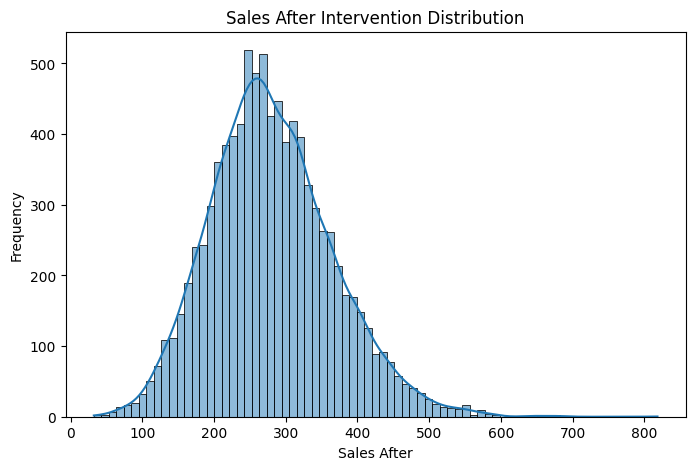

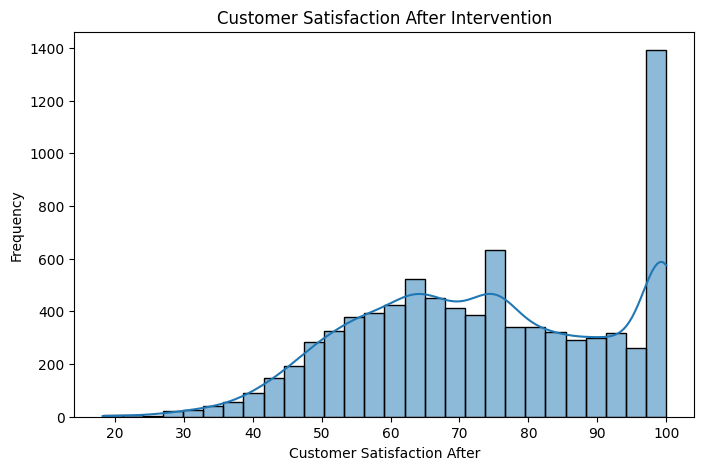

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: distribution of Sales_After
plt.figure(figsize=(8, 5))
plt.title('Sales After Intervention Distribution')
sns.histplot(df['Sales_After'].dropna(), kde=True)   # dropna to avoid NaNs
plt.xlabel('Sales After')
plt.ylabel('Frequency')
plt.show()

# Example: distribution of Customer Satisfaction After
plt.figure(figsize=(8, 5))
plt.title('Customer Satisfaction After Intervention')
sns.histplot(df['Customer_Satisfaction_After'].dropna(), kde=True)
plt.xlabel('Customer Satisfaction After')
plt.ylabel('Frequency')
plt.show()


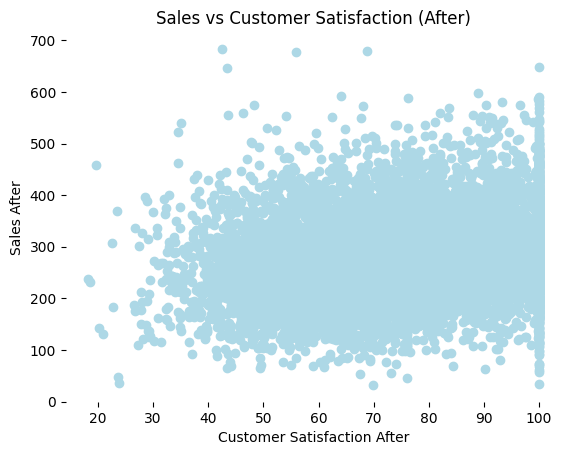

In [8]:
# Relationship between Customer Satisfaction and Sales
plt.scatter(df['Customer_Satisfaction_After'], df['Sales_After'], color='lightblue')
plt.title('Sales vs Customer Satisfaction (After)')
plt.xlabel('Customer Satisfaction After')
plt.ylabel('Sales After')
plt.box(False)
plt.show()


Split the dataset into dependent/independent variables

In [9]:
# Encode the Group column if it exists (Treatment/Control)
if 'Group' in df.columns:
    df['Group'] = df['Group'].map({'Control': 0, 'Treatment': 1})
    df['Group'] = df['Group'].fillna(0)

# Selecting best independent variables
X = df[['Sales_Before', 'Customer_Satisfaction_Before', 'Group']]

# Selecting best dependent variables
y = df[['Sales_After', 'Customer_Satisfaction_After']]


Split data into Train/Test sets

In [10]:
from sklearn.model_selection import train_test_split

# Splitting dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


Train the regression model

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

# Impute missing values in X_train and X_test
imputer_X = SimpleImputer(strategy='mean')
X_train_imputed = imputer_X.fit_transform(X_train)
X_test_imputed = imputer_X.transform(X_test)

# Impute missing values in y_train and y_test
imputer_y = SimpleImputer(strategy='mean')
y_train_imputed = imputer_y.fit_transform(y_train)
y_test_imputed = imputer_y.transform(y_test)

# Regressor model
regressor = LinearRegression()
regressor.fit(X_train_imputed, y_train_imputed)

LinearRegression()

Predict the result

In [14]:
# Prediction result
y_pred_test = regressor.predict(X_test_imputed)     # predicted value of y_test
y_pred_train = regressor.predict(X_train_imputed)   # predicted value of y_train

Plot the training and test results

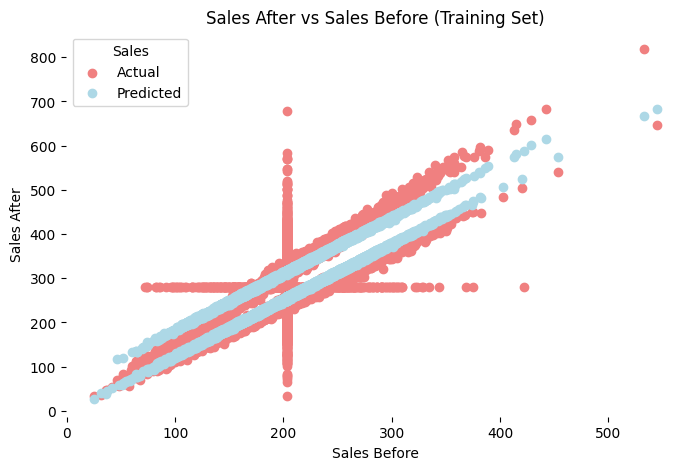

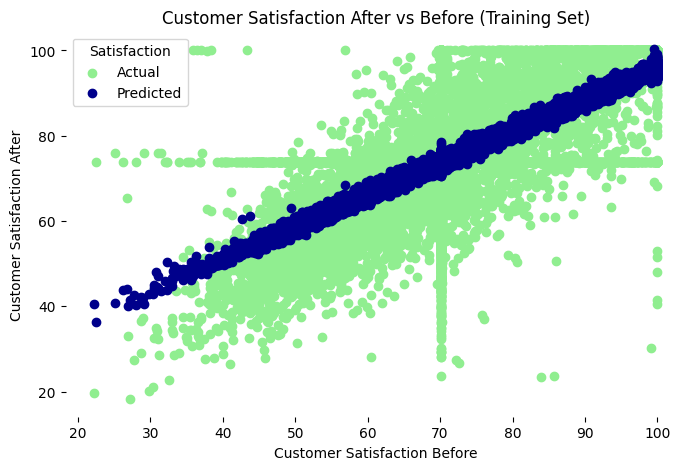

In [18]:
# Predict on training set
y_pred_train = regressor.predict(X_train_imputed)

# Example: plot Sales_After (target) vs Sales_Before (feature)
plt.figure(figsize=(8,5))
plt.scatter(X_train_imputed[:,0], y_train_imputed[:,0], color='lightcoral', label='Actual')
plt.scatter(X_train_imputed[:,0], y_pred_train[:,0], color='lightblue', label='Predicted')
plt.title('Sales After vs Sales Before (Training Set)')
plt.xlabel('Sales Before')
plt.ylabel('Sales After')
plt.legend(title='Sales', loc='best', facecolor='white')
plt.box(False)
plt.show()

# Example: plot Customer_Satisfaction_After vs Customer_Satisfaction_Before
plt.figure(figsize=(8,5))
plt.scatter(X_train_imputed[:,1], y_train_imputed[:,1], color='lightgreen', label='Actual')
plt.scatter(X_train_imputed[:,1], y_pred_train[:,1], color='darkblue', label='Predicted')
plt.title('Customer Satisfaction After vs Before (Training Set)')
plt.xlabel('Customer Satisfaction Before')
plt.ylabel('Customer Satisfaction After')
plt.legend(title='Satisfaction', loc='best', facecolor='white')
plt.box(False)
plt.show()

Plot test set data vs predictions

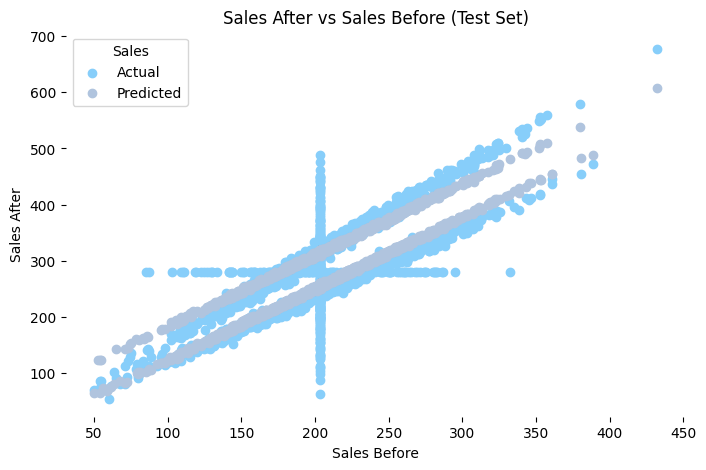

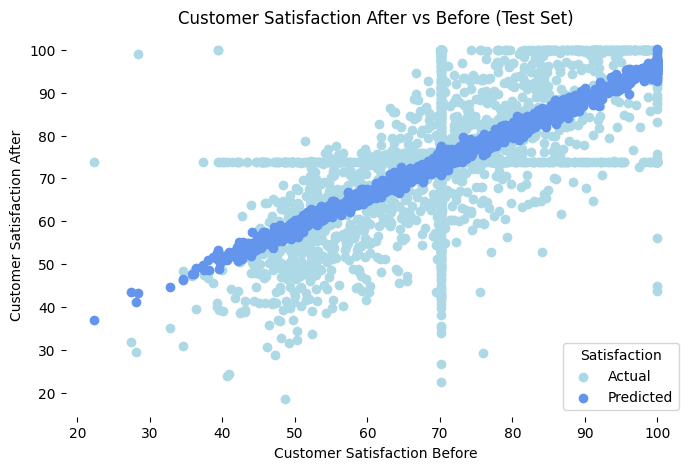

In [24]:
# Predict on test set
y_pred_test = regressor.predict(X_test_imputed)

# Plot Sales_After vs Sales_Before
plt.figure(figsize=(8,5))
plt.scatter(X_test_imputed[:,0], y_test_imputed[:,0], color='lightskyblue', label='Actual')
plt.scatter(X_test_imputed[:,0], y_pred_test[:,0], color='lightsteelblue', label='Predicted')
plt.title('Sales After vs Sales Before (Test Set)')
plt.xlabel('Sales Before')
plt.ylabel('Sales After')
plt.legend(title='Sales', loc='best', facecolor='white')
plt.box(False)
plt.show()

# Plot Customer_Satisfaction_After vs Customer_Satisfaction_Before
plt.figure(figsize=(8,5))
plt.scatter(X_test_imputed[:,1], y_test_imputed[:,1], color='lightblue', label='Actual')
plt.scatter(X_test_imputed[:,1], y_pred_test[:,1], color='cornflowerblue', label='Predicted')
plt.title('Customer Satisfaction After vs Before (Test Set)')
plt.xlabel('Customer Satisfaction Before')
plt.ylabel('Customer Satisfaction After')
plt.legend(title='Satisfaction', loc='best', facecolor='white')
plt.box(False)
plt.show()

Linear equation y = mx + c, we can also get the c (y-intercept) and m (slope/coefficient) from the regressor model.

In [25]:
# Regressor coefficients and intercept
print(f'Coefficient: {regressor.coef_}')
print(f'Intercept: {regressor.intercept_}')

Coefficient: [[ 1.26266969e+00  1.58209723e-01  5.96855054e+01]
 [ 1.99079929e-02  7.29784670e-01 -7.57291674e-02]]
Intercept: [-13.37861966  18.60919811]


**B. Multiple Linear Regression**

In [26]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression

In [27]:
# Get dataset
df = pd.read_csv('/content/Sales_with_NaNs_v1.3.csv')
df.head()

,Group,Customer_Segment,Sales_Before,Sales_After,Customer_Satisfaction_Before,Customer_Satisfaction_After,Purchase_Made
0,Control,High Value,240.548359,300.007568,74.684767,NaN,No
1,Treatment,High Value,246.862114,381.337555,100.000000,100.000000,Yes
2,Control,High Value,156.978084,179.330464,98.780735,100.000000,No
3,Control,Medium Value,192.126708,229.278031,49.333766,39.811841,Yes
4,NaN,High Value,229.685623,NaN,83.974852,87.738591,Yes


In [29]:
# Describe data
df.describe()

,Sales_Before,Sales_After,Customer_Satisfaction_Before,Customer_Satisfaction_After
count,8478.000000,9233.000000,8330.000000,8360.000000
mean,203.716998,280.457952,70.252076,73.872593
std,55.273059,85.659543,16.957010,18.128351
min,24.852966,32.414352,22.202441,18.224938
25%,166.629232,221.436990,56.365513,59.925030
50%,203.323607,273.129170,69.490898,73.844594
75%,238.809147,332.570108,83.426798,90.044365
max,545.422547,818.219997,100.000000,100.000000


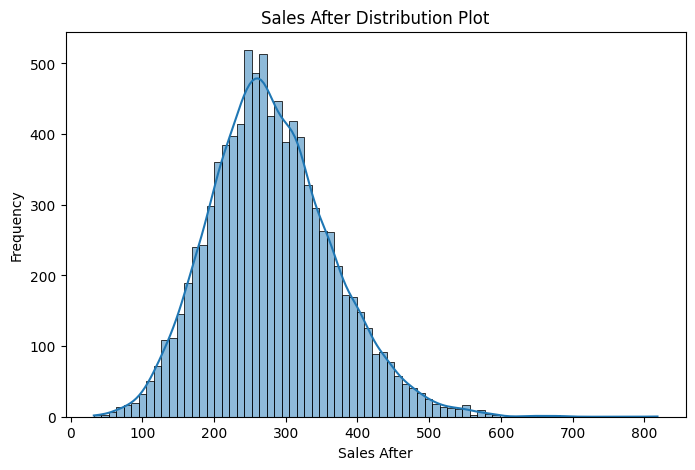

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data distribution
plt.figure(figsize=(8,5))
plt.title('Sales After Distribution Plot')
sns.histplot(df['Sales_After'].dropna(), kde=True)  # dropna avoids NaNs
plt.xlabel('Sales After')
plt.ylabel('Frequency')
plt.show()


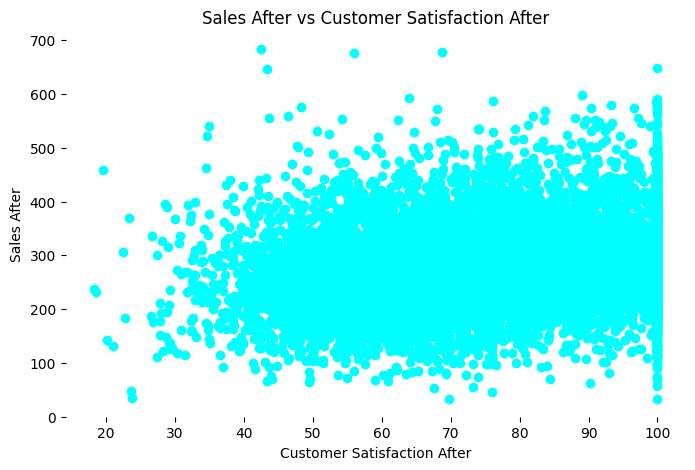

In [32]:
# Relationship between Sales_After and Customer_Satisfaction_After
plt.figure(figsize=(8,5))
plt.scatter(df['Customer_Satisfaction_After'], df['Sales_After'], color='cyan')
plt.title('Sales After vs Customer Satisfaction After')
plt.xlabel('Customer Satisfaction After')
plt.ylabel('Sales After')
plt.box(False)
plt.show()


Split into Independent/Dependent variables

In [33]:
# Independent variables (features before intervention + group)
X = df[['Sales_Before', 'Customer_Satisfaction_Before', 'Group']].values

# Dependent variables (targets after intervention)
y = df[['Sales_After', 'Customer_Satisfaction_After']].values


One-hot encoding

In [34]:
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# One-hot encoding of the 'Group' column (index 2 in X)
ct = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(), [2])],
    remainder='passthrough')

X = np.array(ct.fit_transform(X))


Split into Train/Test sets

In [38]:
from sklearn.model_selection import train_test_split

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

Train model

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

# Impute missing values in X_train and X_test
imputer_X_multi = SimpleImputer(strategy='mean')
X_train_imputed_multi = imputer_X_multi.fit_transform(X_train)
X_test_imputed_multi = imputer_X_multi.transform(X_test)

# Impute missing values in y_train and y_test
imputer_y_multi = SimpleImputer(strategy='mean')
y_train_imputed_multi = imputer_y_multi.fit_transform(y_train)
y_test_imputed_multi = imputer_y_multi.transform(y_test)

# Train multiple regression model
regressor = LinearRegression()
regressor.fit(X_train_imputed_multi, y_train_imputed_multi)

LinearRegression()

Predict results

In [42]:
# Predict results on test set
y_pred = regressor.predict(X_test_imputed_multi)

Compare predictions

In [43]:
import numpy as np

# Set NumPy print options
np.set_printoptions(precision=2)

# Compare predicted vs actual values
result = np.concatenate((y_pred, y_test), axis=1)
result

array([[245.36,  73.19, 245.56,  76.  ],
       [211.94,  59.62, 205.6 ,  69.81],
       [246.22,  73.54, 133.34,  60.94],
       ...,
       [335.53,  95.82, 343.39, 100.  ],
       [284.81,  58.4 , 274.34,    nan],
       [403.26,  66.02, 434.05,  64.21]])

**Conclusion :**

Simple Linear Regression looks at just one factor at a time, so it’s easy to understand and visualize, but it can miss other important influences, making its predictions less accurate. Multiple Linear Regression, on the other hand, takes several factors into account—like Sales_Before, Customer_Satisfaction_Before, and Group—and predicts both Sales_After and Customer_Satisfaction_After at once, giving more reliable and realistic results.

For this dataset, Multiple Linear Regression is the better choice, while Simple Linear Regression is mainly useful for quick, exploratory insights.